## Step1. Reading and Understanding the Data

In [95]:
# Supress warning
import warnings 
warnings.filterwarnings('ignore')

In [96]:
# import necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# for splitting between training and test dataset 
import sklearn
from sklearn.model_selection import train_test_split

# import MinMaxScaler class for rescaling
from sklearn.preprocessing import MinMaxScaler

# RFE and Linear Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# for training model
import statsmodels.api as sm

# Calculate the VIF model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for evaluation'
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [97]:

# read csv file
df = pd.read_csv(r"C:\Users\Namrata\Documents\LearningShubham\Upgrad\Machine_Learning_1\Assignment Bike Sharing\day.csv")


### SubTask 1.1 Inspect the various aspects of  dataset

In [98]:
# overview of  dataset 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [99]:
# shape of datd
df.shape

(730, 16)

In [100]:
#check data types of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Observation
- __temp, atemp, hum, windspeed, casual, registered and cnt__ are continuous variables


In [101]:
# analyse numerical columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Observation:
- instant column is an index column, which is not required as already a default column is available.
- dteday holds date, which is not required as there are columns like yr , mnth holds information about date.
- Sum of Casual and registered is target variable cnt. casual and registered are like target variable ,so it is redundant to keep casual and registered.
- min and max value of __yr, holiday, workingday__ are 1 and 0 respectively . They would be categorical value with value 0 and 1.

### Subtask 1.2 Drop columns

In [102]:
df.drop(['instant','dteday','casual','registered'],axis= 1 , inplace = True  )
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [103]:
# identify categorical columns

print("SEASON column \n",df.season.value_counts())
print("------------------")
print("YR column \n",df.yr.value_counts())
print("------------------")
print("MNTH coulmn \n", df.mnth.value_counts())
print("------------------")
print("HOLIDAY column \n",df.holiday.value_counts())
print("------------------")
print("WEEKDAY column \n",df.weekday.value_counts())
print("------------------")
print("WORKINGDAY column \n ",df.workingday.value_counts())
print("------------------")
print("WEATHERSIT column \n",df.weathersit.value_counts())

SEASON column 
 3    188
2    184
1    180
4    178
Name: season, dtype: int64
------------------
YR column 
 1    365
0    365
Name: yr, dtype: int64
------------------
MNTH coulmn 
 12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64
------------------
HOLIDAY column 
 0    709
1     21
Name: holiday, dtype: int64
------------------
WEEKDAY column 
 6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64
------------------
WORKINGDAY column 
  1    499
0    231
Name: workingday, dtype: int64
------------------
WEATHERSIT column 
 1    463
2    246
3     21
Name: weathersit, dtype: int64


#### Observation  
- season, mnth, weekday and weathersit are categorical variable ,should be converted to dummy variables
- yr, holiday and working are categorical variables with 0 and 1 value . They are not required to convert to dummy variables

## Step 2. Visualizing the Data
    - First we identify if some predictors directly have a strong association with target variable "cnt".
    - Second we also check for multicollinearity

<Figure size 1440x1440 with 0 Axes>

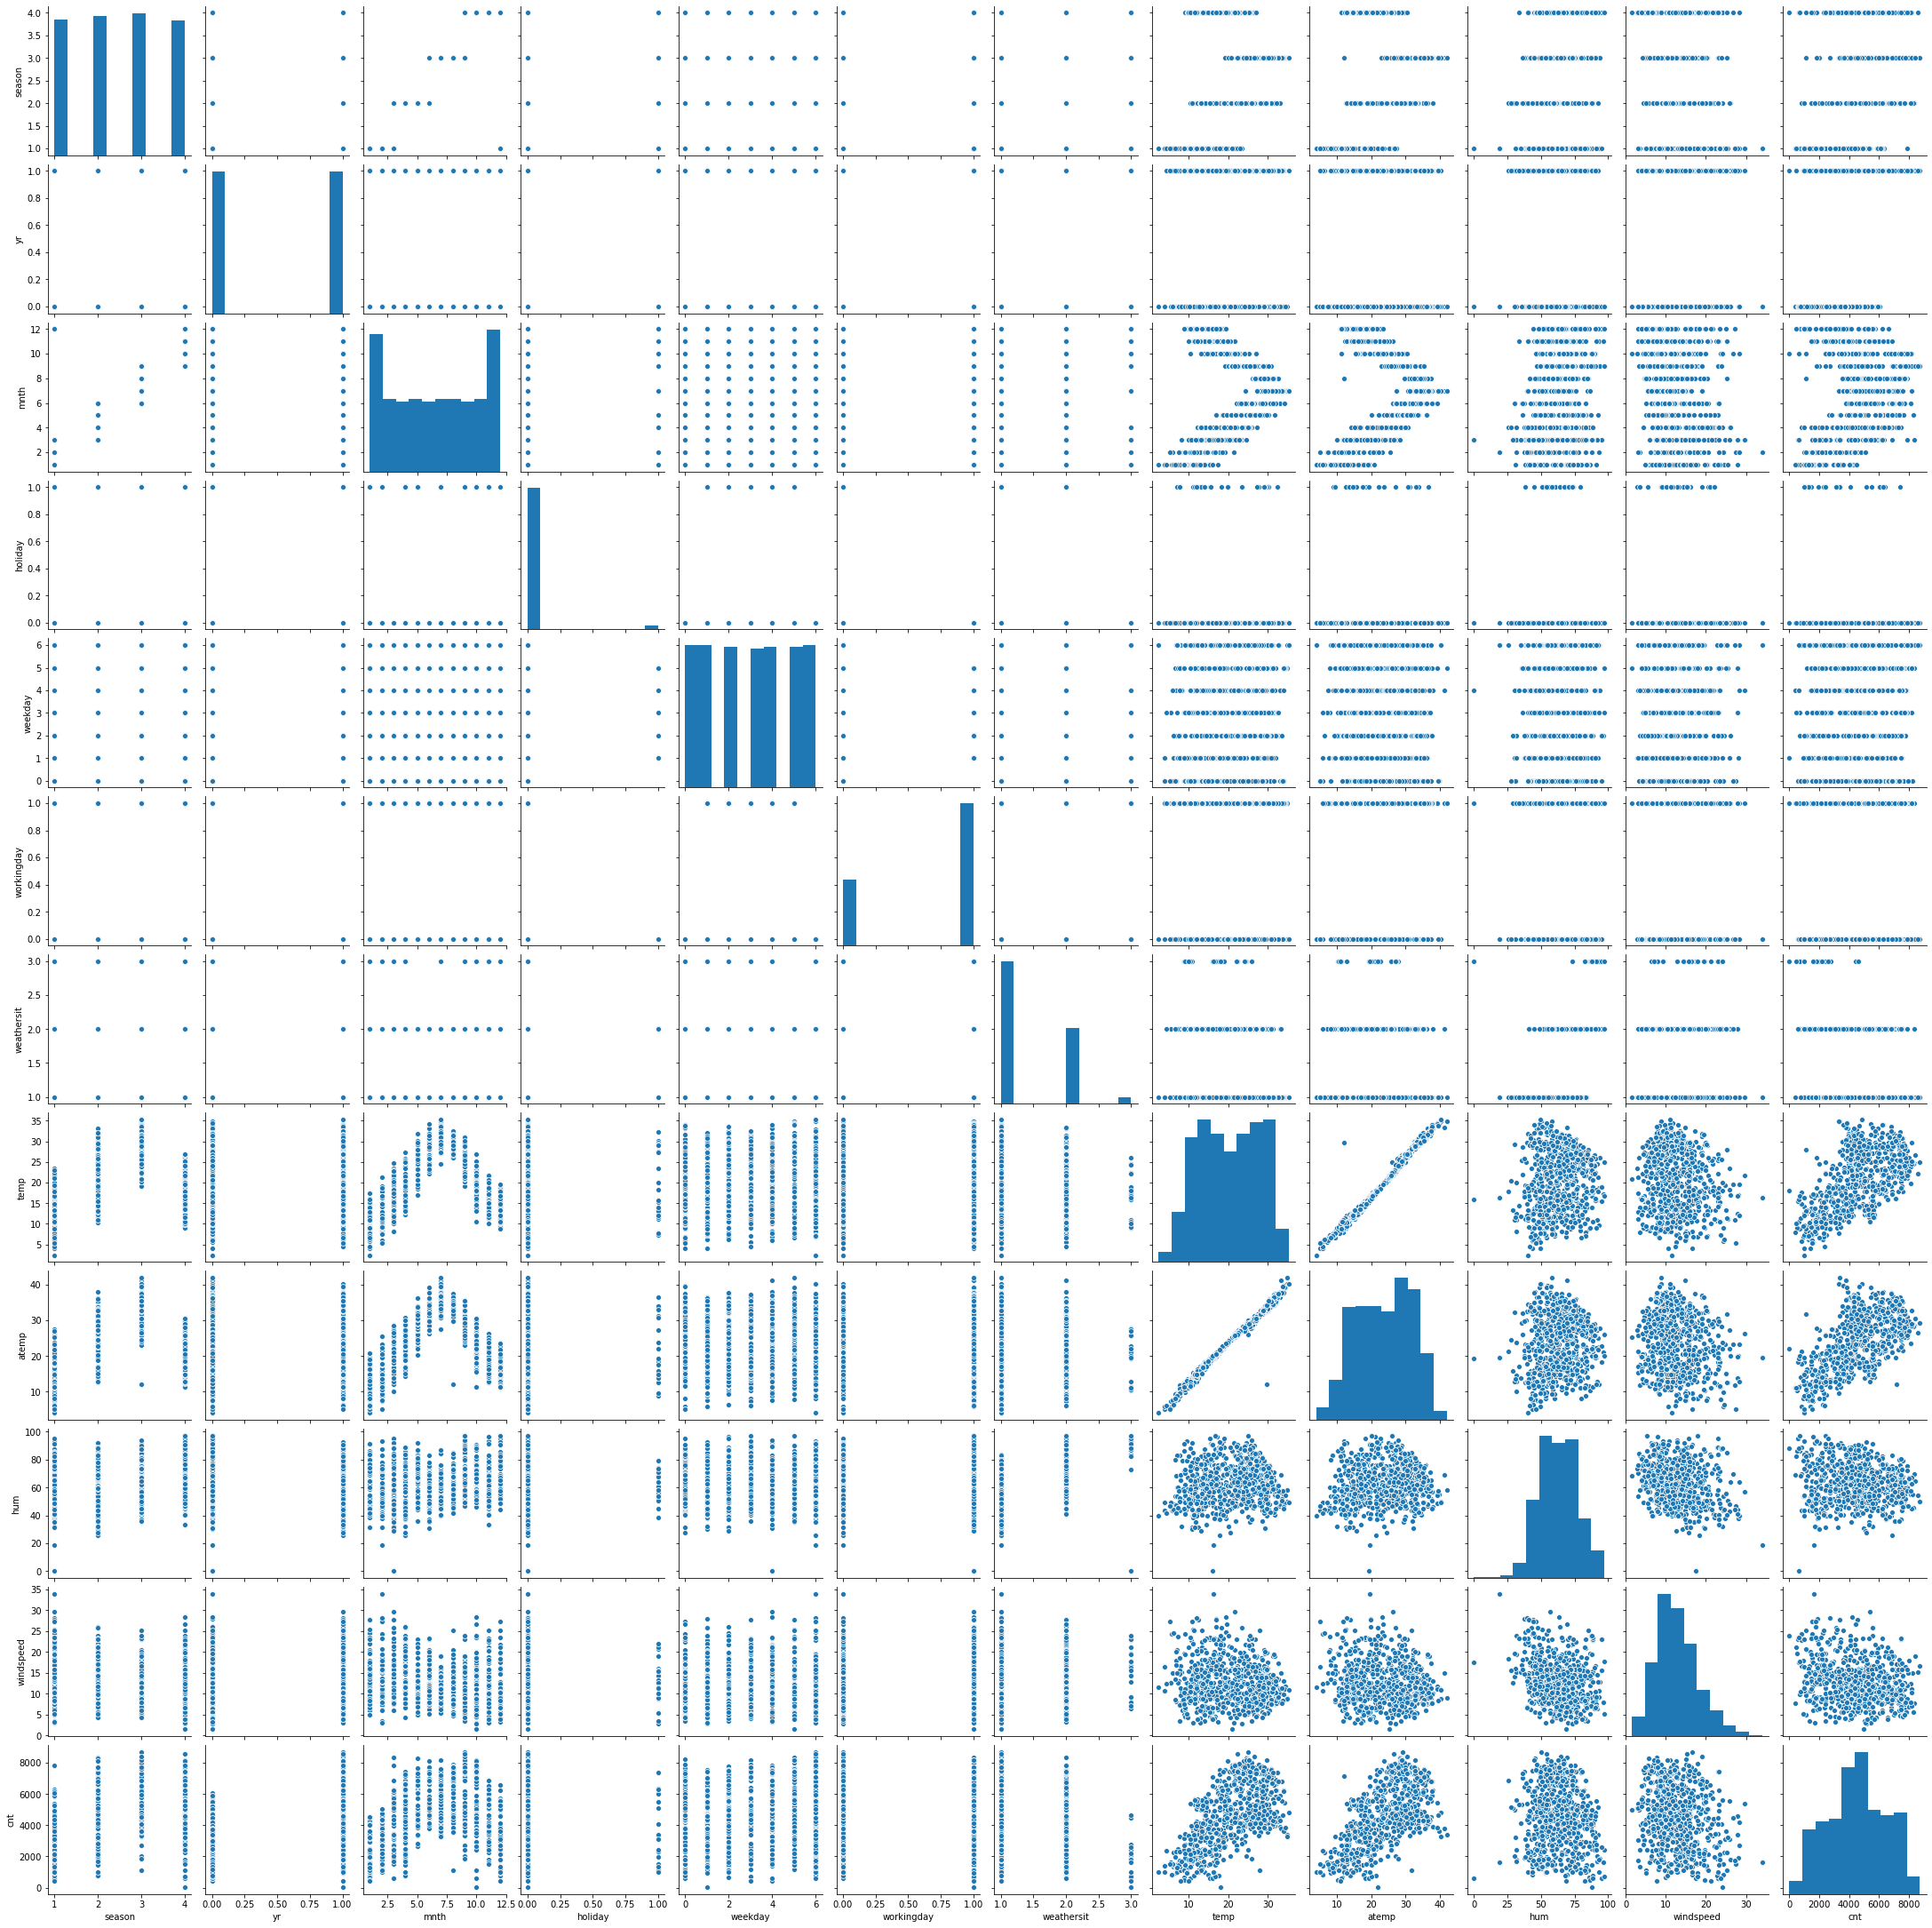

In [104]:
# pair plot for all numeric data
plt.figure(figsize =[20,20])
sns.pairplot(data = df)
plt.show()

#### Observation: 
1. atemp and temp are linearly related, cause to  multicollinearity
2. cnt and temp are linearly related , temp can be good predictor

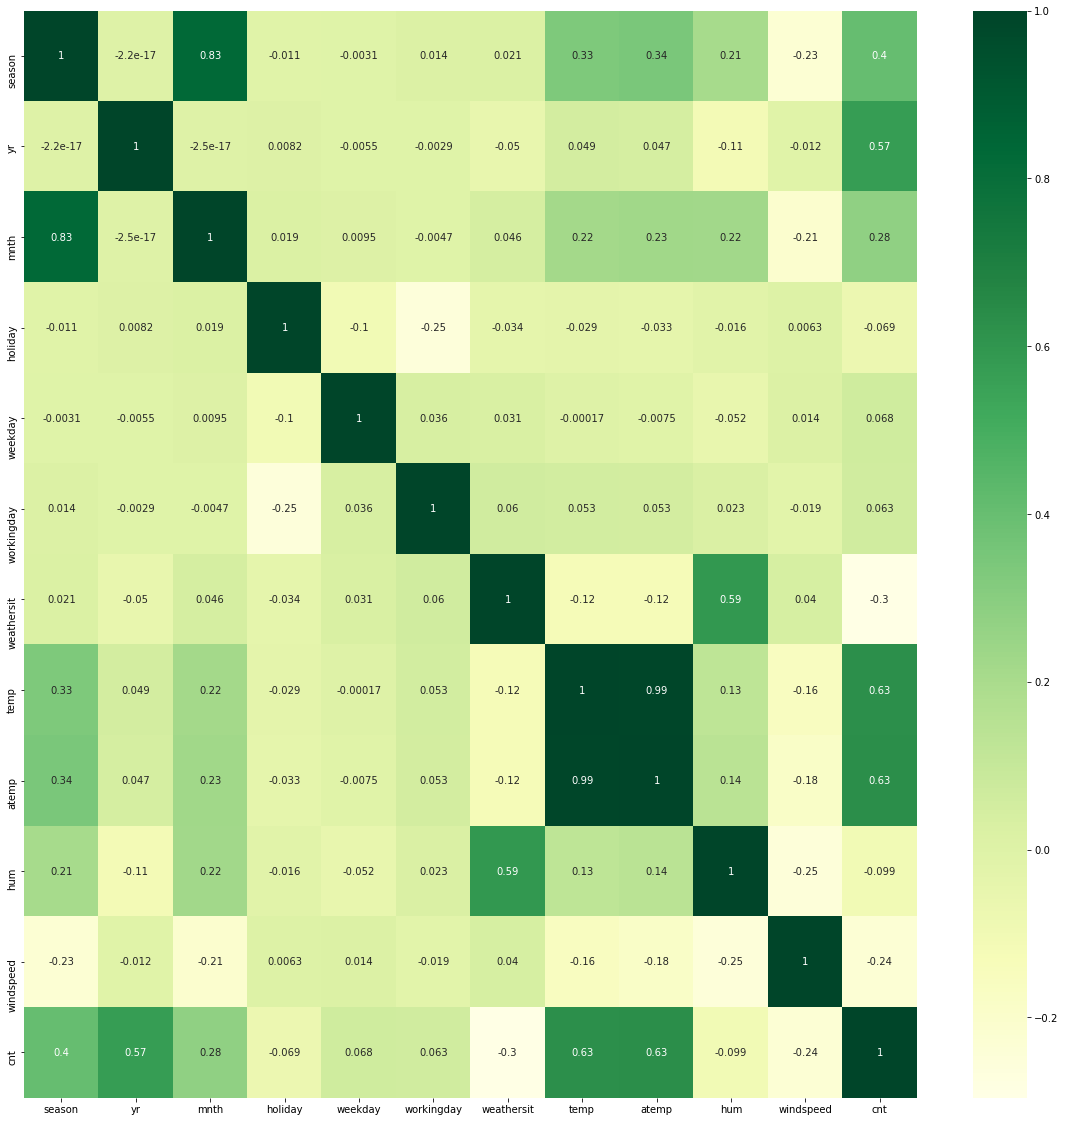

In [105]:
# correlation of numeric data to identify multicollinearity and predictor
plt.figure(figsize = [20,20])
sns.heatmap(df.corr(),annot = True, cmap ='YlGn')
plt.show()

#### Observation 
- __temp__ and __atemp__ are highly correlated,cause to multicolinearity, needs to drop one of them
- month and season are strongly correlated
- weathersit and hum are in good correlation
- target variable __'cnt'__ is highly corelated with __'yr', 'temp', 'atemp'.__ 


In [106]:
# drop atemp
df.drop('atemp', axis = 1 , inplace = True)

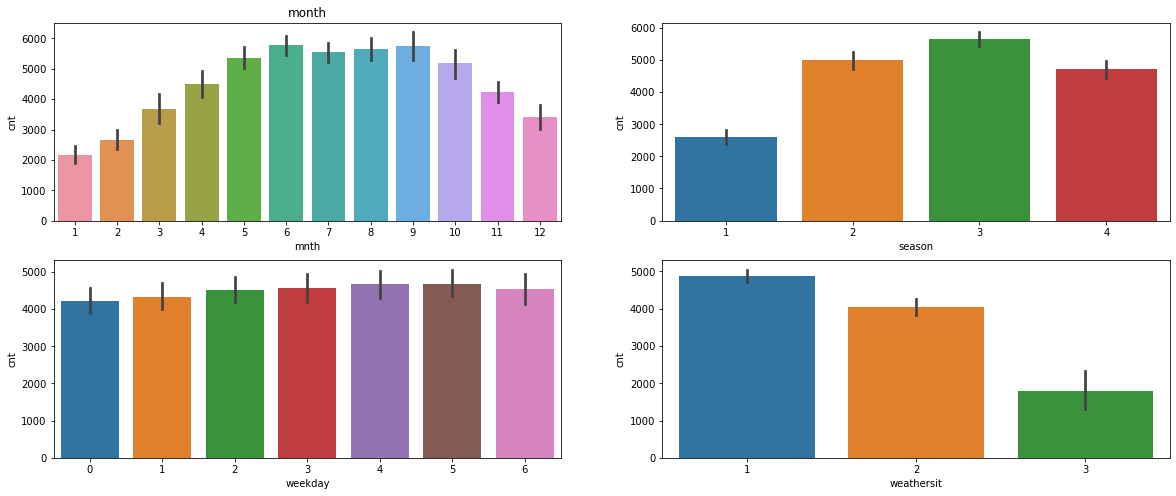

In [107]:
# distribution of target variable of over different season and month

plt.figure(figsize=[20,8])
plt.subplot(2,2,1)
plt.title("month")
sns.barplot(x="mnth", y="cnt", data=df )

plt.subplot(2,2,2)
sns.barplot(x="season", y="cnt", data=df)

plt.subplot(2,2,3)
sns.barplot(x="weekday", y="cnt", data=df)


plt.subplot(2,2,4)
sns.barplot(x="weathersit", y="cnt", data=df)
plt.show()

#### Observation:
- majority of rent is in the mid of year (i.e may to october) 
- since mnth and season are highly correlated , rent also show similar trend
- mostly all day of week are equally rented , with slight variation of wednesday , thursday and friday.
- In clear weather we have high number rent and in light_Snow, rent is low.And there is no rent in heavy_rain.  

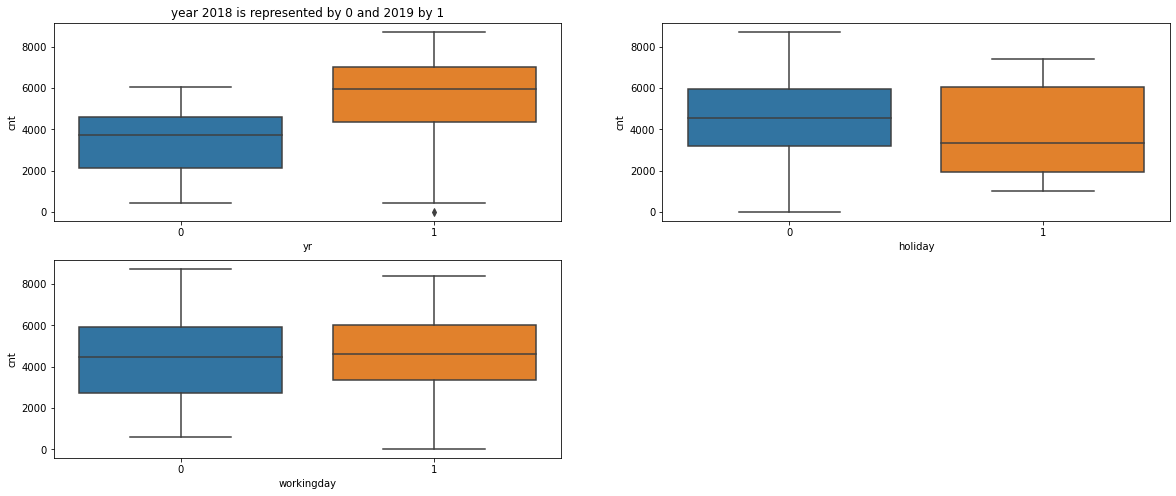

In [17]:
# target varaible over the year
plt.figure(figsize =[20,8])
plt.subplot(2,2,1)
plt.title("year 2018 is represented by 0 and 2019 by 1")
sns.boxplot(x="yr", y="cnt", data=df)
plt.subplot(2,2,2)
plt.title("")
sns.boxplot(x="holiday", y="cnt", data=df)
plt.subplot(2,2,3)
plt.title("")
sns.boxplot(x="workingday", y="cnt", data=df)

plt.show()

#### Observation:
- significantly higher rent in the year 2019 compare to 2018
- average of rent is higher in non holidays.
- however the rent on working and non workingday are found to be similar. 

## Step 3. Data Preparation


### Subtask 3.1.  Encoding
- The variables like __yr, holiday, workingday__ are __yes/ no__ type and are already in 0 or 1, so no change in them.
- Variables like __season, mnth, weekday and weathersit__ are categorical need to create dummy variables for them 

 The categorical variables __'season','mnth','weekday' and 'weathersit'__ are not in string format.
 So first convert them in string.

In [108]:
# mapping season from numerical to string 

def season_name(x):
    season = ['spring','summer','fall','winter']
    return season[x-1]
df['season'] = df['season'].apply(season_name)
df['season'] = df['season'].astype('object')

# mapping mnth from numerical to string

def mnth_name(x):
    month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    return month[x-1] 

df['mnth'] = df['mnth'].apply(mnth_name)
df['mnth'] = df['mnth'].astype('str')

# mapping weekday from numerical to string
def day_name(x):
    day = ['Sun','Mon','Tue','Wed','Thur','Fri','Sat']
    return day[x]

df['weekday'] = df['weekday'].apply(day_name)
df['weekday'] = df['weekday'].astype('str')

# mapping weekday from numerical to string
def weather_name(x):
    weather = ['clear','mist','light_rain','heavy_rain']
    return weather[x-1]

df['weathersit'] = df['weathersit'].apply(weather_name)
df['weathersit'] = df['weathersit'].astype('str')

In [109]:
# inspect the changes
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,clear,9.305237,43.6957,12.522300,1600


In [110]:
# inspect the changes in datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [111]:
#list of varibles for whom dummy variables need to create
dummy_varlist = ['season','mnth','weekday','weathersit']

In [112]:
# create dummy varibles 
dummy_season     =pd.get_dummies(df['season'], drop_first = True)
dummy_mnth       =pd.get_dummies(df['mnth'], drop_first = True)
dummy_weekday    =pd.get_dummies(df['weekday'], drop_first = True)
dummy_weathersit =pd.get_dummies(df['weathersit'], drop_first = True)

#concat all dummy dataset with maindataset
df = pd.concat([df,dummy_season,dummy_mnth,dummy_weekday,dummy_weathersit],axis = 1)

# drop all the main variables whose dummy variables are created
df.drop(dummy_varlist, axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_rain,mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [113]:
# inspect changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Aug         730 non-null    uint8  
 11  Dec         730 non-null    uint8  
 12  Feb         730 non-null    uint8  
 13  Jan         730 non-null    uint8  
 14  Jul         730 non-null    uint8  
 15  Jun         730 non-null    uint8  
 16  Mar         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Nov         730 non-null    uint8  
 19  Oct         730 non-null    u

### SubTask 3.2.  Splitting the data into trainig and test set

In [204]:
# create test and train data set

df_train , df_test = train_test_split(df, train_size = 0.7 , random_state = 100 )

# check how many data with train data set and how 
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Subtask 3.3. Rescaling  the features

- We will only rescale numeric variables
- Variables are having values 0 and 1 , are not be rescaled , as meaning of 0 and 1 is already clear , rescaling may loose the interpretation.

In [205]:
# Instantaite an object 
scaler = MinMaxScaler()

# create a list numeric variables to be rescaled
cols = ['temp','hum','windspeed','cnt']

# fit and tranform the data between min and max value
df_train[cols] = scaler.fit_transform(df_train[cols])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_rain,mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [116]:
# check the data has been adjusted between min and max value
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_rain,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observation:
- maximum value of rescaled variables are set as 1 and minimum are set as 0

### Subtask 3.4. Divide data in X and Y

In [206]:
# Create X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [118]:
# check X_train and y_train
print(y_train)
X_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64


,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_rain,mist
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
79,0,0,1,0.462664,0.759870,0.529881,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


## Task 4. Data Modelling

### Subtask 4.1 selecting top 15 variables using RFE

In [207]:
# Running RFE  to select top 15 variables
#instantiate an object 
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(X_train , y_train)

In [120]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 8),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thur', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('light_rain', True, 1),
 ('mist', True, 1)]

In [208]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Sep', 'Sat', 'Sun', 'light_rain', 'mist'],
      dtype='object')

### Subtask 4.2 Building model using statsmodels.

In [209]:
# creating X_train dataset with RFE selected variables
X_train_rfe = X_train[col]

In [210]:
# add constant 
X_train_sm = sm.add_constant(X_train_rfe)

# create model
lr = sm.OLS(y_train,X_train_sm).fit()

#check summary 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          2.11e-191
Time:                        07:28:07   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1995      0.028      7.200      0.0

In [211]:

vif= pd.DataFrame()
X = X_train_rfe
vif['Features'] =X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
2,workingday,50.68
11,Sat,12.20
12,Sun,11.79
6,spring,5.02
3,temp,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.62
4,hum,1.91
14,mist,1.57


#### Observation:
- p- value of holiday is very high , that's why it should be dropped.

In [212]:
X_train_rfe.drop('holiday', axis = 1,inplace = True)

In [213]:
# add constant 
X_train_sm = sm.add_constant(X_train_rfe)

# create model
lr = sm.OLS(y_train,X_train_sm).fit()

#check summary 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          2.11e-191
Time:                        07:28:27   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.042      4.301      0.0

In [214]:
# Calculate the VIF model

vif= pd.DataFrame()
X = X_train_rfe
vif['Features'] =X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
3,hum,32.10
2,temp,18.99
1,workingday,18.41
4,windspeed,4.91
10,Sat,4.91
5,spring,4.80
11,Sun,4.76
7,winter,3.69
6,summer,3.04
13,mist,2.31


#### Observation:
- p- value of all variables are ok
- but VIF of __hum__ is very high , that's why it should be dropped.

In [215]:
X_train_rfe.drop('hum', axis = 1,inplace = True)

In [216]:
# add constant 
X_train_sm = sm.add_constant(X_train_rfe)

# create model
lr = sm.OLS(y_train,X_train_sm).fit()

#check summary 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          1.28e-188
Time:                        07:28:39   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1008      0.038      2.624      0.0

In [217]:
# Calculate the VIF model

vif= pd.DataFrame()
X = X_train_rfe
vif['Features'] =X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.74
3,windspeed,4.76
9,Sat,4.45
10,Sun,4.21
4,spring,3.82
6,winter,2.78
5,summer,2.76
0,yr,2.07
7,Jul,1.60


#### Observation:
- p- value of all variables are ok
- but VIF of __workingday__ is very high , that's why it should be dropped.

In [218]:
X_train_rfe.drop('workingday',axis=1 ,inplace = True)

In [219]:
# add constant 
X_train_sm = sm.add_constant(X_train_rfe)

# create model
lr = sm.OLS(y_train,X_train_sm).fit()

#check summary 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          2.06e-186
Time:                        07:28:49   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2003      0.030      6.760      0.0

In [220]:
# Calculate the VIF model

vif= pd.DataFrame()
X = X_train_rfe
vif['Features'] =X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
1,temp,5.18
2,windspeed,4.62
4,summer,2.24
3,spring,2.11
0,yr,2.07
5,winter,1.82
6,Jul,1.59
11,mist,1.55
7,Sep,1.33
8,Sat,1.22


#### Observation:
- VIF of all variables are ok
- but p-value of __Sat__ is very high , that's why it should be dropped.

In [221]:
X_train_rfe.drop('Sat', axis = 1,inplace = True)

In [222]:
# add constant 
X_train_sm = sm.add_constant(X_train_rfe)

# create model
lr = sm.OLS(y_train,X_train_sm).fit()

#check summary 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          3.37e-187
Time:                        07:29:00   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2034      0.030      6.877      0.0

In [223]:
# Calculate the VIF model

vif= pd.DataFrame()
X = X_train_rfe
vif['Features'] =X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.60
4,summer,2.23
3,spring,2.09
0,yr,2.07
5,winter,1.80
6,Jul,1.59
10,mist,1.55
7,Sep,1.33
8,Sun,1.17


#### Observation
- p - value of all the variables are pretty low.
- VIF of temp is more than 5 , but in business prespective temp is an important variable, so we cannot drop it.
- Check the correlation of temp with other left over variables. 

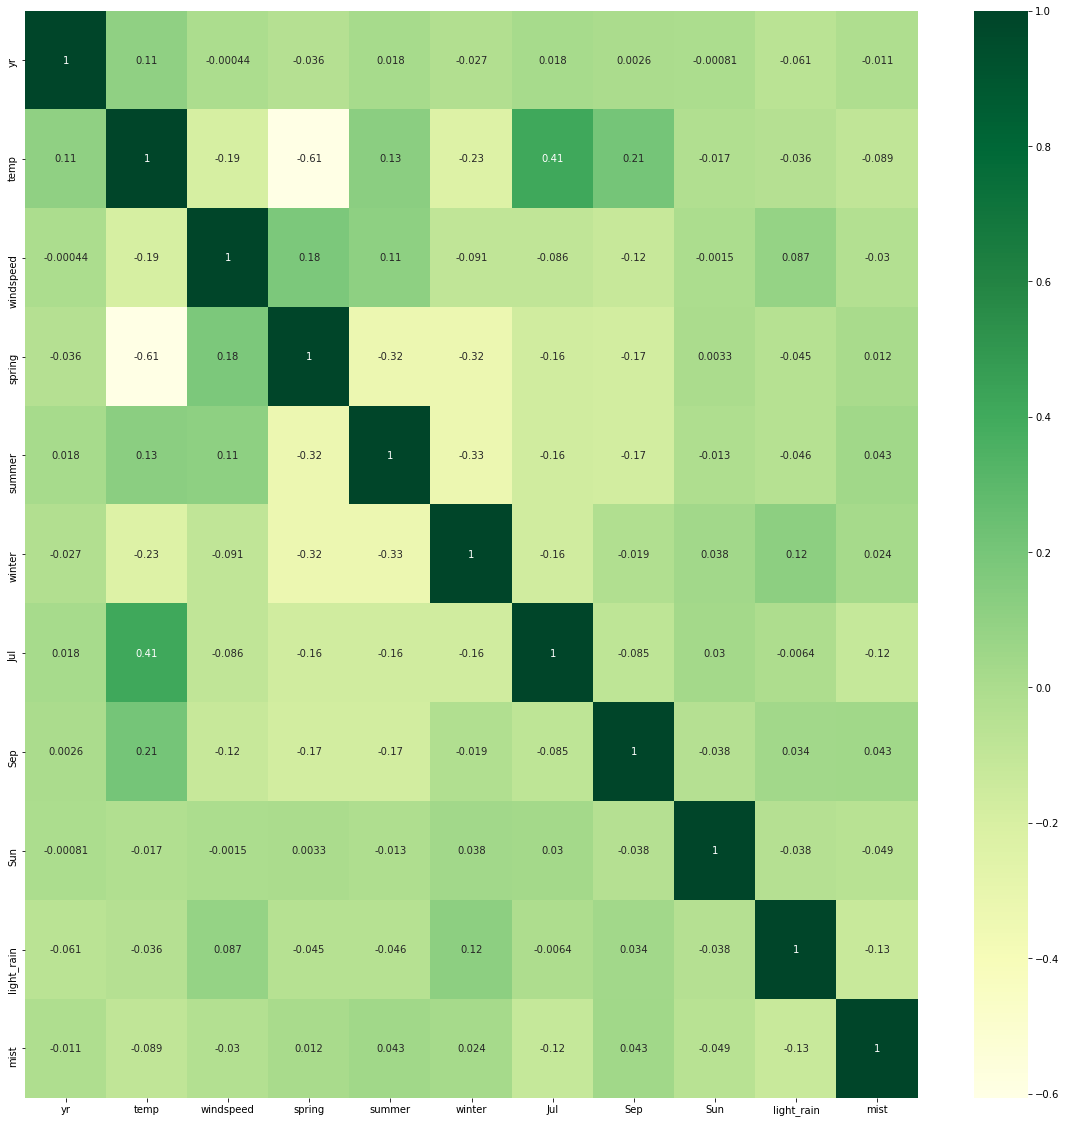

In [47]:
# analysing the correlation between left over variables 
plt.figure(figsize = [20,20])
sns.heatmap(X_train_rfe.corr(),annot = True, cmap ='YlGn')
plt.show()

#### Observation
- there is high corrlation between __temp__ and __spring__ , and also between __temp__ and __july.__
- Here we can drop any one spring or Jul , so we will check dropping which variable would give better model as per its parameter
- first we will keep Spring and drop Jul, then drop spring and keep Jul, and check p-values, VIF and R-square and adj Rsquare.  

In [137]:
# create one copy of X_train_rfe
X_train_rfe1 = pd.DataFrame(X_train_rfe)

#### First case drop spring and keep Jul

In [138]:
# train dataset used here is X_train_rfe1
X_train_rfe1.drop('spring', axis = 1,inplace = True)
# add constant 
X_train_sm = sm.add_constant(X_train_rfe1)

# create model
lr = sm.OLS(y_train,X_train_sm).fit()

#check summary 
print(lr.summary())
vif= pd.DataFrame()
X = X_train_rfe1
vif['Features'] =X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.55e-186
Time:                        23:17:26   Log-Likelihood:                 493.94
No. Observations:                 510   AIC:                            -965.9
Df Residuals:                     499   BIC:                            -919.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1246      0.017      7.389      0.0

,Features,VIF
1,temp,5.10
2,windspeed,3.09
0,yr,2.01
3,summer,1.76
5,Jul,1.52
9,mist,1.49
4,winter,1.46
6,Sep,1.29
7,Sun,1.16
8,light_rain,1.08


#### Second case drop Jul and keep spring

In [224]:
# train dataset used here is X_train _rfe
X_train_rfe.drop('Jul', axis = 1,inplace = True)

In [225]:
# add constant 
X_train_sm = sm.add_constant(X_train_rfe)

# create model
lr = sm.OLS(y_train,X_train_sm).fit()

#check summary 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Tue, 28 Jul 2020   Prob (F-statistic):          5.70e-187
Time:                        07:29:21   Log-Likelihood:                 495.81
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     499   BIC:                            -923.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1956      0.030      6.611      0.0

In [226]:
# Calculate the VIF model

vif= pd.DataFrame()
X = X_train_rfe
vif['Features'] =X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,spring,2.00
4,summer,1.91
5,winter,1.64
9,mist,1.55
6,Sep,1.22
7,Sun,1.17
8,light_rain,1.08


#### Observation:
- In first case , adj R square = 0.829, R_squared = 0.832, p- value of Jul is 0.05, and VIF of temp is more than 5.
- In second case , adj R square = 0.830, R_squared = 0.833, p- value of spring is 0.006, and VIF of temp is less than 5.
- So it is clear that second case is better than first , and we will build model by dropping Jul.

#### Now we can see all variables has p - value less than 0.01, as well as VIF also lies within 5.
#### And now we cannot drop any variable further, also we have only 10 variables. 
#### Finally we can go ahead with this model to evaluate and predict. 

##  Step 5 Residual Ananlysis

### Sunbtask 5.1 error term normal distribution check

In [227]:
df_1 = pd.concat([y_train, X_train_rfe],axis = 1)
df_1.head()


,cnt,yr,temp,windspeed,spring,summer,winter,Sep,Sun,light_rain,mist
576,0.827658,1,0.815169,0.264686,0,0,0,0,0,0,0
426,0.465255,1,0.442393,0.255342,1,0,0,0,0,0,1
728,0.204096,1,0.245101,0.663106,1,0,0,0,1,0,0
482,0.482973,1,0.395666,0.188475,0,1,0,0,0,0,1
111,0.191095,0,0.345824,0.380981,0,1,0,0,0,0,1


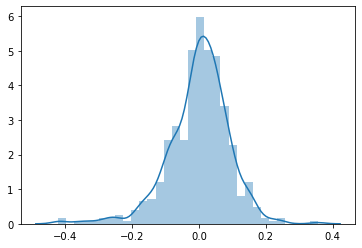

In [228]:
# predict train data set for residual check
y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred

# plot histogram of residual
plt.figure()
sns.distplot( res )
plt.show()

#### Observation
- The error term is normally distributed with mean value zero.
- Assumption is valid

#### Check error distribution having any pattern 

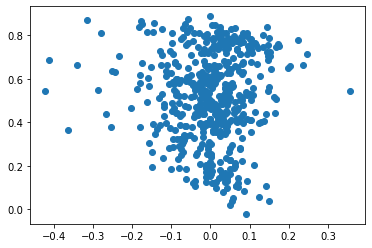

In [229]:
plt.figure()
plt.scatter(res, y_train_pred)
plt.show()

#### Observation 
- There is no pattern observed , hence assumption is valid.

#### check RMSE of train data  set

In [230]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

0.09152723403962482

#### Observation:
- RMSE value is less than 0.1, that is good.

#### Check R squared of train dataset

In [231]:
r_squared = r2_score(y_train,y_train_pred)
r_squared

0.8333418171181379

## Step 6 Prediction and Evaluation on the test set

### Subtask 6.1 Preprocessing test dataset 

In [232]:
# columns in df_test need to resacle
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_rain,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,20.808400,61.934025,12.598352,4560.559091,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,7.672796,14.429542,4.973534,1904.968544,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,3.957390,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.119375,51.354200,9.031466,3312.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.790424,60.708350,12.188004,4582.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.299153,72.179375,15.385361,5913.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,34.815847,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Rescaling test dataset

In [233]:
# create a list numeric variables to be rescaled
cols = ['temp','hum','windspeed','cnt']

# fit and tranform the data between min and max value
df_test[cols] = scaler.transform(df_test[cols])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_rain,mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Split the y_test and X_test 

In [234]:
y_test = df_test.pop('cnt')
X_test = df_test

In [235]:
#inspect test dataset
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,light_rain,mist
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Remove extra features from X_test

In [236]:
selected_features = ['yr','temp','windspeed','Jul','summer','winter','Sep','Sun','light_rain','mist']
X_test = X_test[selected_features]
X_test.head()

,yr,temp,windspeed,Jul,summer,winter,Sep,Sun,light_rain,mist
184,0,0.831783,0.084219,1,0,0,0,0,0,1
535,1,0.901354,0.153728,0,1,0,0,0,0,0
299,0,0.511964,0.334206,0,0,1,0,0,0,1
221,0,0.881625,0.339570,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,1,0,0,0,0,0


### Subtask 6.2 predict the test data set

#### add constant to X_test 

In [237]:
# add constant to test data
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,temp,windspeed,Jul,summer,winter,Sep,Sun,light_rain,mist
184,1.0,0,0.831783,0.084219,1,0,0,0,0,0,1
535,1.0,1,0.901354,0.153728,0,1,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,1,0,0,0,0,0


#### predict the cnt variable from model using test data set

In [238]:
#predict y_test
y_test_pred = lr.predict(X_test_sm)

### Subtask 6.3 Evaluation

#### check normal distribution of residual /error

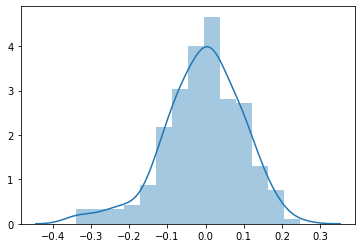

In [239]:
res = y_test - y_test_pred
plt.figure()
sns.distplot(res)
plt.show()

#### Observation
- The error term is normally distributed with mean value zero.
- Assumption is valid on test data set as well.


#### Check error distribution having any pattern 

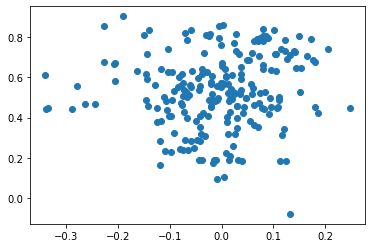

In [240]:
plt.figure()
plt.scatter(res,y_test_pred)
plt.show()

#### Observation 
- There is no pattern observed , hence assumption is valid.

#### check RMSE

In [241]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

0.10309008694979609

#### Check R square for test data set

In [242]:
r_squared = r2_score(y_test,y_test_pred)
r_squared

0.7777323816903405

#### compare predicted value and actual value

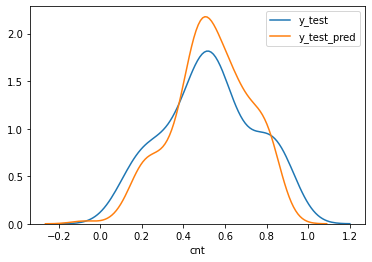

In [202]:
plt.figure()
sns.distplot(y_test , hist = False, label = "y_test")
sns.distplot(y_test_pred, hist = False, label = "y_test_pred")

plt.show()

#### Observation:
- The test variable and predicted variable is almost overlapping.

## REPORT
- Top 3 variables with positive coefficent are
    - temp
    - yr
    - winter
- Top 3 variables with negative coefficent are:
    - light_rain
    - windspeed
    - mist
#### Conclusion:
- More the heat and more the winter, more bikes will be rented. 
- Business cannot control yr value.
- light_rain ,mist and high wind speed are not good condition for business.